# Predicting 2020 Amazon Stock Data #

## Importing Libraries & Dependencies ##

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime as dt 

# Importing Keras Libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Visualising 2012-2019 Amazon Stock Data ##

In [31]:
start = dt(2012, 1, 1)
end = dt(2019, 5, 31)
amzn = web.DataReader('AMZN', 'yahoo', start, end)

amzn.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-24,1841.760010,1817.849976,1835.890015,1823.280029,3369700,1823.280029
2019-05-28,1849.270020,1827.349976,1832.750000,1836.430054,3200000,1836.430054
2019-05-29,1830.000000,1807.530029,1823.119995,1819.189941,4279000,1819.189941
2019-05-30,1829.469971,1807.829956,1825.489990,1816.319946,3146900,1816.319946
2019-05-31,1795.589966,1772.699951,1790.010010,1775.069946,4618800,1775.069946


In [33]:
# Are there any NaN values in our table?

amzn.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [35]:
# What datatype is each of our columns in?

amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2012-01-03 to 2019-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1864 non-null   float64
 1   Low        1864 non-null   float64
 2   Open       1864 non-null   float64
 3   Close      1864 non-null   float64
 4   Volume     1864 non-null   int64  
 5   Adj Close  1864 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 101.9 KB


In [37]:
# Visualising the Data #

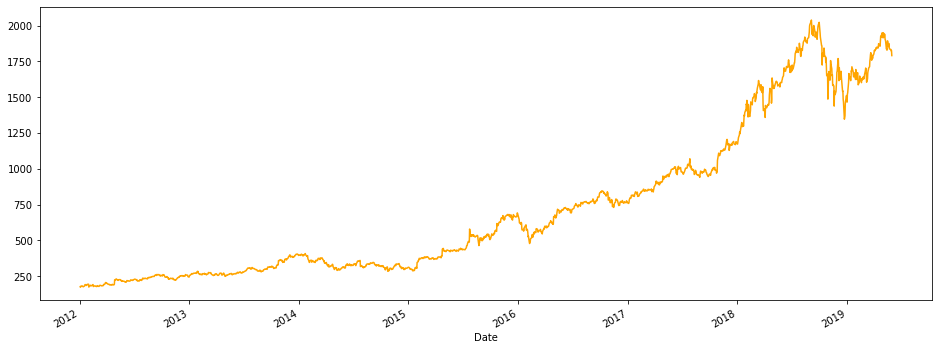

In [39]:
amzn_fig1 = amzn['Open'].plot(figsize = (16, 6), color = 'orange')

In [41]:
# 30 day rolling mean

amzn_roll7 = amzn.rolling(30).mean()
amzn_roll7.tail(15)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-10,1888.054325,1861.021667,1876.432992,1877.498995,4.150027e+06,1877.498995
2019-05-13,1889.843660,1862.400667,1878.098995,1878.896663,4.232113e+06,1878.896663
2019-05-14,1891.069324,1862.968001,1879.411995,1879.760999,4.245123e+06,1879.760999
2019-05-15,1892.883659,1863.564001,1879.976326,1881.666667,4.286607e+06,1881.666667
2019-05-16,1895.800659,1865.986336,1881.950326,1884.562333,4.310847e+06,1884.562333
2019-05-17,1898.526660,1868.090670,1884.363660,1886.233667,4.347937e+06,1886.233667
2019-05-20,1899.499996,1868.435673,1885.153324,1886.956665,4.353193e+06,1886.956665
2019-05-21,1900.459998,1869.132007,1886.538660,1887.212000,4.361603e+06,1887.212000
2019-05-22,1901.073332,1869.772673,1886.748328,1888.006669,4.335677e+06,1888.006669


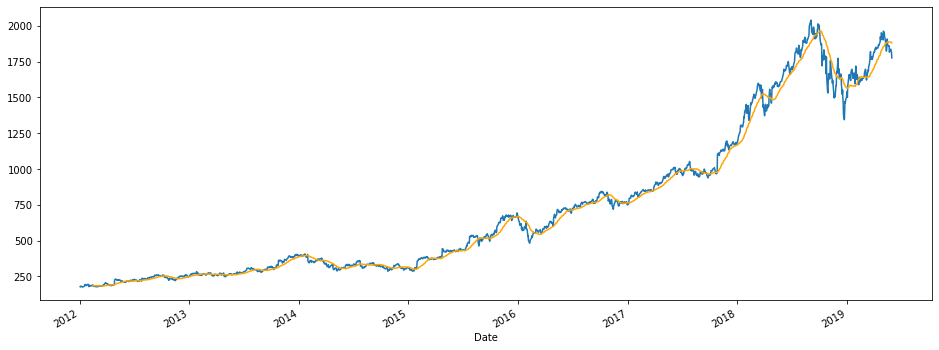

In [43]:
amzn_fig2 = amzn['Close'].plot(figsize = (16, 6))

amzn_fig2
amzn_roll7['Close'].plot(color = 'orange')

## Setting Up Training Data Set ##

In [45]:
training_set = amzn['Open']
training_set = pd.DataFrame(training_set)

In [47]:
# Data cleaning

amzn.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [49]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Find out length of dataframe for next part

training_set_scaled.shape[0]

1864

In [50]:
# Create a dataset with 60 timesteps and 1 output

x_train = []
y_train = []
for i in range(60, 1864):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

What the above does is, i = 60 initially, meaning that it will take all the data from dat 1 through to day 59 (x_train) and make a prediction (y_train) on the 60th day. Following that, it will go from day 2 through to day 60 and make another prediction on day 61, and so on until be run through the entire dataset (1864).

In [51]:
# Initialising the RNN

regression = Sequential()

## Training the Neural Network ##

Feed the data into the model and train it for prediction, ensuring the assign random biases and weights to take into account.

Dropouts are included since they are able to reduce the error % as weights update.

In [52]:
# First LSTM layer + Dropout

regression.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regression.add(Dropout(0.2))

# Second LSTM layer + Dropout

regression.add(LSTM(units = 50, return_sequences = True))
regression.add(Dropout(0.2))

# Third LSTM layer + Dropout

regression.add(LSTM(units = 50, return_sequences = True))
regression.add(Dropout(0.2))

# Fourth LSTM layer + Dropout

regression.add(LSTM(units = 50))
regression.add(Dropout(0.2))

# Output layer

regression.add(Dense(units = 1))

## Optimisation ##

Optimisers allow the program to find the best way to learn. Here, we want to find the value that gives us the minimum loss (be it money, time, resources, etc). There are various ways to find the minimum point. However, we don't know what the curve looks like when we begin the search for the minimum. 

In order to find the minumum for a parameter, we can take gradients to determine if the minimum is in front, or behind. This is called gradient descent. We can also look at the curvature (second derivative). If the curve is getting steeper, a large step can be taken, if curve is getting shallower, a smaller step is taken. However, with this we might end up in a local minimum. 

I will be using Adam. Adam is an adaptive learning rate method - it results in different learning rates for different parameters. Furthermore, Adam is able to have momentum, meaning learning rates occur differently as time progresses.

In [42]:
# Compile the RNN

regression.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting RNN to Training Set

regression.fit(x_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
1804/1804 [==============================] - 42s 23ms/step - loss: 0.0356
Epoch 2/100
1804/1804 [==============================] - 25s 14ms/step - loss: 0.0033
Epoch 3/100
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0028
Epoch 4/100
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0025
Epoch 5/100
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0025
Epoch 6/100
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0021
Epoch 7/100
1804/1804 [==============================] - 24s 13ms/step - loss: 0.0022
Epoch 8/100
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0030
Epoch 9/100
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0020
Epoch 10/100
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0020
Epoch 11/100
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0021
Epoch 12/100
1804/1804 [============================

## Making Predictions and Visualising Results ##

In [44]:
start_real = dt(2019, 1, 1)
end_real = dt(2020, 1, 1)
amzn_real = web.DataReader('AMZN', 'yahoo', start_real, end_real)
amzn_real_price = amzn_real.iloc[:, 1:2].values

In [46]:
# Predicted stock price for the remainder of 2020

amzn_total = pd.concat((amzn['Open'], amzn_real['Open']), axis = 0)
inputs = amzn_total[len(amzn_total) - len(amzn_real) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 310):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regression.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

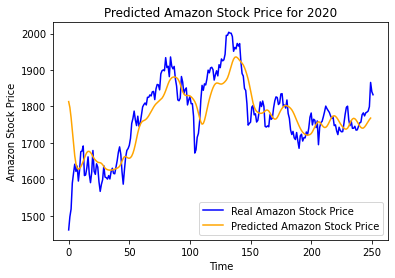

In [48]:
# Visualising the Results

plt.plot(amzn_real_price, color = 'blue', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'orange', label = 'Predicted Amazon Stock Price')
plt.title('Predicted Amazon Stock Price for 2020')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()